Codes used to type and visualise the answers can be found [here](https://github.com/Satriawidy/ortvay_2026)

**Question**

A cylinder with homogeneous mass distribution, density $\rho$, radius $a$ and length $h$ is cut into two equal halves in a plane perpendicular to its symmetry axis. What is the attractive force between the two halves if the distance between them is negligible compared to the dimensions of the cylinder? In the absence of an analytical result, calculate the attractive force numerically for different values of $h/a$. Determine the approximate analytical form of the attractive force in the case of $h \gg a$ and compare it with the numerical results.

(József Cserti)

**Answer**

The attractive force of one body due to another body can be expressed as
\begin{equation*}
\vec{F}_{AB} = \int dV_A~\rho_A\int dV_B ~G\rho_B\frac{\vec{r_A} - \vec{r_B}}{|\vec{r_A} - \vec{r_B}|^3}
\end{equation*}

In our case, we know that $\rho_A = \rho_B = \rho$. We can also deduce that, since the cylinder is cut symmetrically into half, the total force should only be directed into one direction, which we will call $x$. We would like to use the cylindrical symmetry well, and do the integration in the cylindrical coordinate $r, \phi, z$, which translate into the Cartesian one in the following ways

\begin{equation*}
x = r\sin\phi, ~~~~~~~~~~y = r\cos\phi, ~~~~~~~~~~ z = z
\end{equation*}

These conventions mean that the force can be expressed as

\begin{align*}
\vec{F}_{12} &= F_{12, x}~\hat{x} = G\rho^2 \int \mathcal{DV}_{12} f_{12} ~\hat{x}\\
\mathcal{DV}_{12} &= \int_{0}^{h} dz_1\int_{0}^{h}dz_2\int_{0}^{\pi}d\phi_1\int_{\pi}^{2\pi}d\phi_2\int_{0}^{a}dr_1~r_1\int_{0}^{a}dr_2~r_2\\
f_{12} &= \frac{r_1\sin\phi - r_2\sin\phi_2 + d}{[(r_1\sin\phi_1 - r_2\sin\phi_2 + d)^2 + (r_1\cos\phi_1 - r_2\cos\phi_2)^2 + (z_1 - z_2)^2]^3}
\end{align*}

where $d$ is the distance between the two cylinders.

**Approximated Result**

We can exploit the symmetry of our system to obtain approximated result. We start using Gauss-like law for gravity

\begin{equation*}
    gA = 4\pi G M_A
\end{equation*}

We set our symmetrical surface as a concentric cylinder with the same height and smaller radius $s$. Assuming $h\gg a$, we could argue that the gravitational acceleration will mostly pull towards the axis of this cylinder, giving
\begin{equation*}
    g [2\pi rh] = 4\pi G[\rho (\pi r^2h)] \implies g(r) = 2\pi G\rho r
\end{equation*} 
This is not the full picture, as we need to project $g$ into $x$ direction
\begin{equation*}
    g_x(r) = 2\pi G\rho r\sin\phi
\end{equation*}
The total force will then be

\begin{align*}
    F_x &= \int_0^{h} dz\int_{0}^{\pi}d\phi\int_{0}^{a}dr~r~g(r)\\
    &= 2\pi G\rho \int_0^{h} dz\int_{0}^{\pi}d\phi~\sin\phi\int_{0}^{a}dr~r^2\\
    &= \frac{4}{3}\pi G\rho a^3h
\end{align*}

**Numerical result**

As we need to deal with 6-dimensional integral, a standard numerical integration will take too much time to achieve a desired uncertainty. Instead, we will be using Monte Carlo integrator. In python, this could be done using ```vegas```. To boost efficiency, we will transform our integral into scaleless form.

\begin{align*}
F_{12, x} &= G\rho h^3\int \mathcal{DV'}_{12}f_{12}\\
\mathcal{DV'}_{12} &= \int_{0}^{1} dz_1\int_{0}^{1}dz_2\int_{0}^{\pi}d\phi_1\int_{\pi}^{2\pi}d\phi_2\int_{0}^{a/h}dr_1~r_1\int_{0}^{a/h}dr_2~r_2\\
\end{align*}

In [1]:
import vegas
import numpy as np
import matplotlib.pyplot as plt

# The scaleless integral
def f(x):
    dx = x[0] * np.sin(x[2]) - x[1] * np.sin(x[3])
    dy = x[0] * np.cos(x[2]) - x[1] * np.cos(x[3])
    dz = x[4] - x[5]
    return x[0] * x[1] * dx / (dx**2 + dy**2 + dz**2)**(1.5)

Here we are using various ratio of $h/a$, spanning from $1$ to $32$.

In [ ]:
a = 1
hs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128])
ra = []
er = []
for h in hs:
    integ = vegas.Integrator([[0, a/h], [0, a/h], [0, np.pi], 
                              [np.pi, 2*np.pi], [0, 1], [0, 1]])
    result = integ(f, nitn=20, neval=50000)
    ra.append(result.mean / (4*np.pi*((a/h)**3)/3))
    er.append(result.sdev / (4*np.pi*((a/h)**3)/3))
    print(f'h/a = {h}, numeric = {result}, approx = {4*np.pi*((a/h)**3)/3:.8f}')

h/a = 1, numeric = 1.9844(15), approx = 4.18879020
h/a = 2, numeric = 0.34378(27), approx = 0.52359878
h/a = 4, numeric = 0.052402(53), approx = 0.06544985
h/a = 6, numeric = 0.016679(20), approx = 0.01939255
h/a = 8, numeric = 0.007302(11), approx = 0.00818123
h/a = 12, numeric = 0.0022474(41), approx = 0.00242407
h/a = 16, numeric = 0.0009634(20), approx = 0.00102265
h/a = 24, numeric = 0.00029035(74), approx = 0.00030301
h/a = 32, numeric = 0.00012326(38), approx = 0.00012783
h/a = 48, numeric = 3.700(15)e-05, approx = 0.00003788
h/a = 64, numeric = 1.5518(78)e-05, approx = 0.00001598
h/a = 96, numeric = 4.595(28)e-06, approx = 0.00000473
h/a = 128, numeric = 1.973(14)e-06, approx = 0.00000200


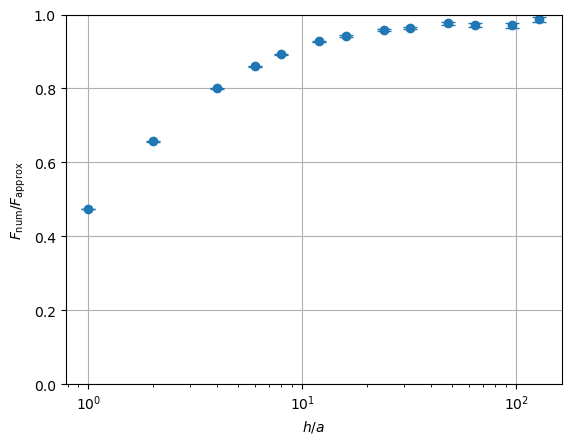

In [13]:
plt.errorbar(hs, ra, er, linestyle = "", capsize = 5, fmt = 'o')
plt.ylabel(r'$F_{\text{num}}/F_{\text{approx}}$')
plt.xlabel(r'$h/a$')
plt.xscale('log')
plt.grid('True')
plt.ylim(0, 1)
plt.show()

We can see that both the numerical integration converge towards the approximated result $\left(\boxed{F_x = 4\pi G\rho a^3h/3}\right)$ as $h/a$ increases.